The purpose of this project is to analyze rental offers for apartments in Berlin in order to understand what factors are most important when choosing an apartment. This analysis will help identify patterns and trends in the Berlin rental market, and will provide insights that can help renters find the perfect apartment.

Data \
The data was scraped from Immoscout24, the largest real estate platform in Germany. Immoscout24 features listings for both rental properties and homes for sale. The data that was gathered are only offers for rental properties from the dates 2018-09-22, 2019-05-10, and 2019-10-08.

Features \
The dataset comprises a comprehensive collection of essential property details, including living area dimensions, rent amounts, both base rent and total rent (if applicable), geographical location (street and house number, if available, ZIP code, and state), and energy type, among other specifications. Additionally, the dataset features two variables that provide longer descriptions in free text form: "description," which provides textual details about the offer, and "facilities," which outlines all available facilities, the most recent renovation date, and more. To indicate the time of scraping, a date column has been incorporated.

Acknowledgements \
The data originates from www.immobilienscount24.de and is intended solely for research purposes. The dataset was compiled using.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
data = pd.read_csv("immo_data.csv")

In [3]:
print(data.shape)

(268850, 49)


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [5]:
print(data.describe())

       serviceCharge  telekomHybridUploadSpeed   picturecount     pricetrend  \
count  261941.000000                   45020.0  268850.000000  267018.000000   
mean      151.206113                      10.0       9.791958       3.389001   
std       308.295790                       0.0       6.408399       1.964874   
min         0.000000                      10.0       0.000000     -12.330000   
25%        95.000000                      10.0       6.000000       2.000000   
50%       135.000000                      10.0       9.000000       3.390000   
75%       190.000000                      10.0      13.000000       4.570000   
max    146118.000000                      10.0     121.000000      14.920000   

       telekomUploadSpeed     totalRent  yearConstructed       scoutId  \
count       235492.000000  2.283330e+05    211805.000000  2.688500e+05   
mean            28.804928  9.013315e+02      1966.400590  1.069697e+08   
std             16.337151  3.323833e+04        46.992207 

In [6]:
# Take data only for Berlin
data_berlin = data[data['regio1'] == 'Berlin']
data_berlin.reset_index(drop=True)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Berlin,320.00,central_heating,NaN,NaN,False,True,10,4.99,NaN,...,Berlin,Staaken_Spandau,Diese attraktive EG-Wohnung kann ab sofort bez...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
1,Berlin,79.00,central_heating,ONE_YEAR_FREE,NaN,False,False,17,7.35,40.0,...,Berlin,Weißensee_Weißensee,Suchen Sie eine 2-Zimmerwohnung in Weißensee? ...,Zusammengefasst bietet die Wohnung:\n+ Vollstä...,68.00,NaN,NaN,NaN,NaN,Oct19
2,Berlin,150.00,floor_heating,ONE_YEAR_FREE,NaN,True,True,15,6.60,40.0,...,Berlin,Mitte_Mitte,Dieses luxuriöse Neubauquartier direkt am Luis...,"• sehr ruhig gelegen, trotz zentraler Lage, da...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Berlin,228.78,floor_heating,NaN,NaN,False,True,2,8.63,NaN,...,Berlin,Kreuzberg_Kreuzberg,Bei dieser ansprechenden Immobilie handelt es ...,Balkon und 10m Terasse,NaN,NaN,NaN,NaN,NaN,Oct19
4,Berlin,147.08,district_heating,ONE_YEAR_FREE,NaN,True,True,9,7.56,40.0,...,Berlin,Tiergarten_Tiergarten,"In the """"Wasserstadt - Mitte"""" you can expect ...",Your spacious ground floor apartment is equipp...,73.54,B,2019.0,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10401,Berlin,155.00,central_heating,ONE_YEAR_FREE,NaN,False,False,9,6.90,40.0,...,Berlin,Friedrichshagen_Köpenick,"1-Zimmer-Wohnung, DG links\n\n\nGröße: 57 m² ...","gefliestes Duschbad, wandhängendes WC,\nEinba...",30.00,NaN,NaN,NaN,NaN,May19
10402,Berlin,100.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,False,10,7.59,40.0,...,Berlin,Spandau_Spandau,Extras:\n- Treppenhausreinigung\n- Hausmeister...,"Allgemein:\n- Kabel-TV, Grundversorgung\n- Vor...",NaN,NaN,NaN,90.76,0.1985,Sep18
10403,Berlin,200.00,district_heating,ONE_YEAR_FREE,NaN,False,True,16,8.45,40.0,...,Berlin,Waidmannslust_Reinickendorf,Die hier angebotene Mietwohnung befindet sich ...,"- Erstbezug\n- 3,5 Zimmer\n- modernisiertes, g...",130.00,F,2019.0,NaN,NaN,May19
10404,Berlin,100.00,district_heating,ONE_YEAR_FREE,NaN,True,False,13,6.14,40.0,...,Berlin,Charlottenburg_Charlottenburg,Bei dem Objekt handelt es sich um einen energi...,"Das Apartment ist voll möbliert, mit einer vol...",NaN,NaN,2019.0,NaN,NaN,Feb20


In [7]:
# Rename columns
data_berlin.rename(columns={'regio3': 'area'}, inplace=True)

/var/folders/8v/rckm0lb94_j3zslsg67zk9yc0000gn/T/ipykernel_43844/181880605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_berlin.rename(columns={'regio3': 'area'}, inplace=True)


In [8]:
# Drop columns with more than half null values
null_cols = data_berlin.columns[data_berlin.isna().sum() / len(data_berlin) > 0.50]
data_berlin = data_berlin.drop(columns=null_cols)

In [9]:
# Remove irrelevant columns
irr_cols = ['regio1','telekomTvOffer', 'newlyConst', 'picturecount', 'pricetrend', 'telekomUploadSpeed',
            'scoutId', 'firingTypes', 'geo_bln', 'cellar', 'yearConstructedRange', 'houseNumber',
            'geo_krs', 'condition', 'interiorQual', 'street', 'streetPlain', 'baseRentRange',
            'geo_plz', 'thermalChar', 'noRoomsRange', 'livingSpaceRange', 'regio2', 'description',
            'facilities', 'date']
data_berlin = data_berlin.drop(columns=irr_cols)

In [10]:
print(data_berlin.columns)

Index(['serviceCharge', 'heatingType', 'balcony', 'totalRent',
       'yearConstructed', 'hasKitchen', 'baseRent', 'livingSpace',
       'petsAllowed', 'lift', 'typeOfFlat', 'noRooms', 'floor',
       'numberOfFloors', 'garden', 'area', 'heatingCosts'],
      dtype='object')


In [11]:
# Fill missing numeric data with mean
data_berlin.fillna(data_berlin._get_numeric_data().mean(), inplace=True)

In [12]:
print(data_berlin.isna().sum())

serviceCharge         0
heatingType        1471
balcony               0
totalRent             0
yearConstructed       0
hasKitchen            0
baseRent              0
livingSpace           0
petsAllowed        4838
lift                  0
typeOfFlat          804
noRooms               0
floor                 0
numberOfFloors        0
garden                0
area                  0
heatingCosts          0
dtype: int64


In [13]:
# Fill missing categorical data with most common value 
for cols in data_berlin.columns:
    if data_berlin[cols].dtype == 'object' or data_berlin[cols].dtype == 'bool':
        mode_value = data_berlin[cols].value_counts().head(1).index[0]
        data_berlin[cols].fillna(mode_value, inplace=True)


In [14]:
print(data_berlin.isna().sum()/len(data_berlin))

serviceCharge      0.0
heatingType        0.0
balcony            0.0
totalRent          0.0
yearConstructed    0.0
hasKitchen         0.0
baseRent           0.0
livingSpace        0.0
petsAllowed        0.0
lift               0.0
typeOfFlat         0.0
noRooms            0.0
floor              0.0
numberOfFloors     0.0
garden             0.0
area               0.0
heatingCosts       0.0
dtype: float64


In [15]:
# Remove outliers
for cols in data_berlin.columns:
    if data_berlin[cols].dtype == 'int64' or data_berlin[cols].dtype == 'float64':
        upper_range = data_berlin[cols].mean() + 3 * data_berlin[cols].std()
        lower_range = data_berlin[cols].mean() - 3 * data_berlin[cols].std()
        indexes = data_berlin[(data_berlin[cols] > upper_range) | (data_berlin[cols] < lower_range)].index
        data_berlin.drop(indexes, inplace=True)

In [16]:
# Replace values of true and false with 1 and 0
cols_to_replace = ['balcony', 'hasKitchen', 'lift', 'garden']
data_berlin[cols_to_replace] = data_berlin[cols_to_replace].replace({True: 1, False: 0})

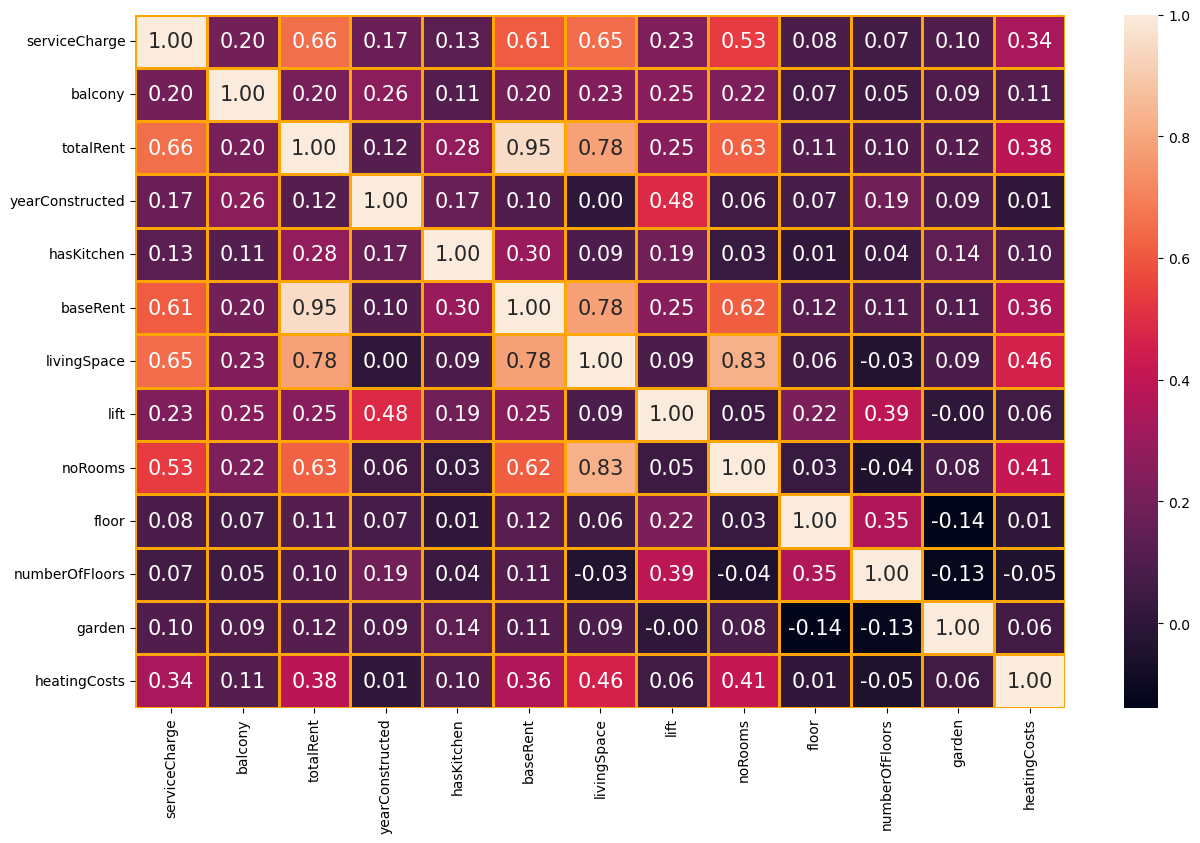

In [17]:
# Make a correlation matrix
plt.figure(figsize=(15,9))
sns.heatmap(data_berlin.corr(), annot=True, fmt='.2f', annot_kws={'size':15}, linewidth=2, linecolor='orange')
plt.show()

There is a strong correlation between total rent and living space, and also between total rent and base rent.

Text(0, 0.5, 'Total Rent')

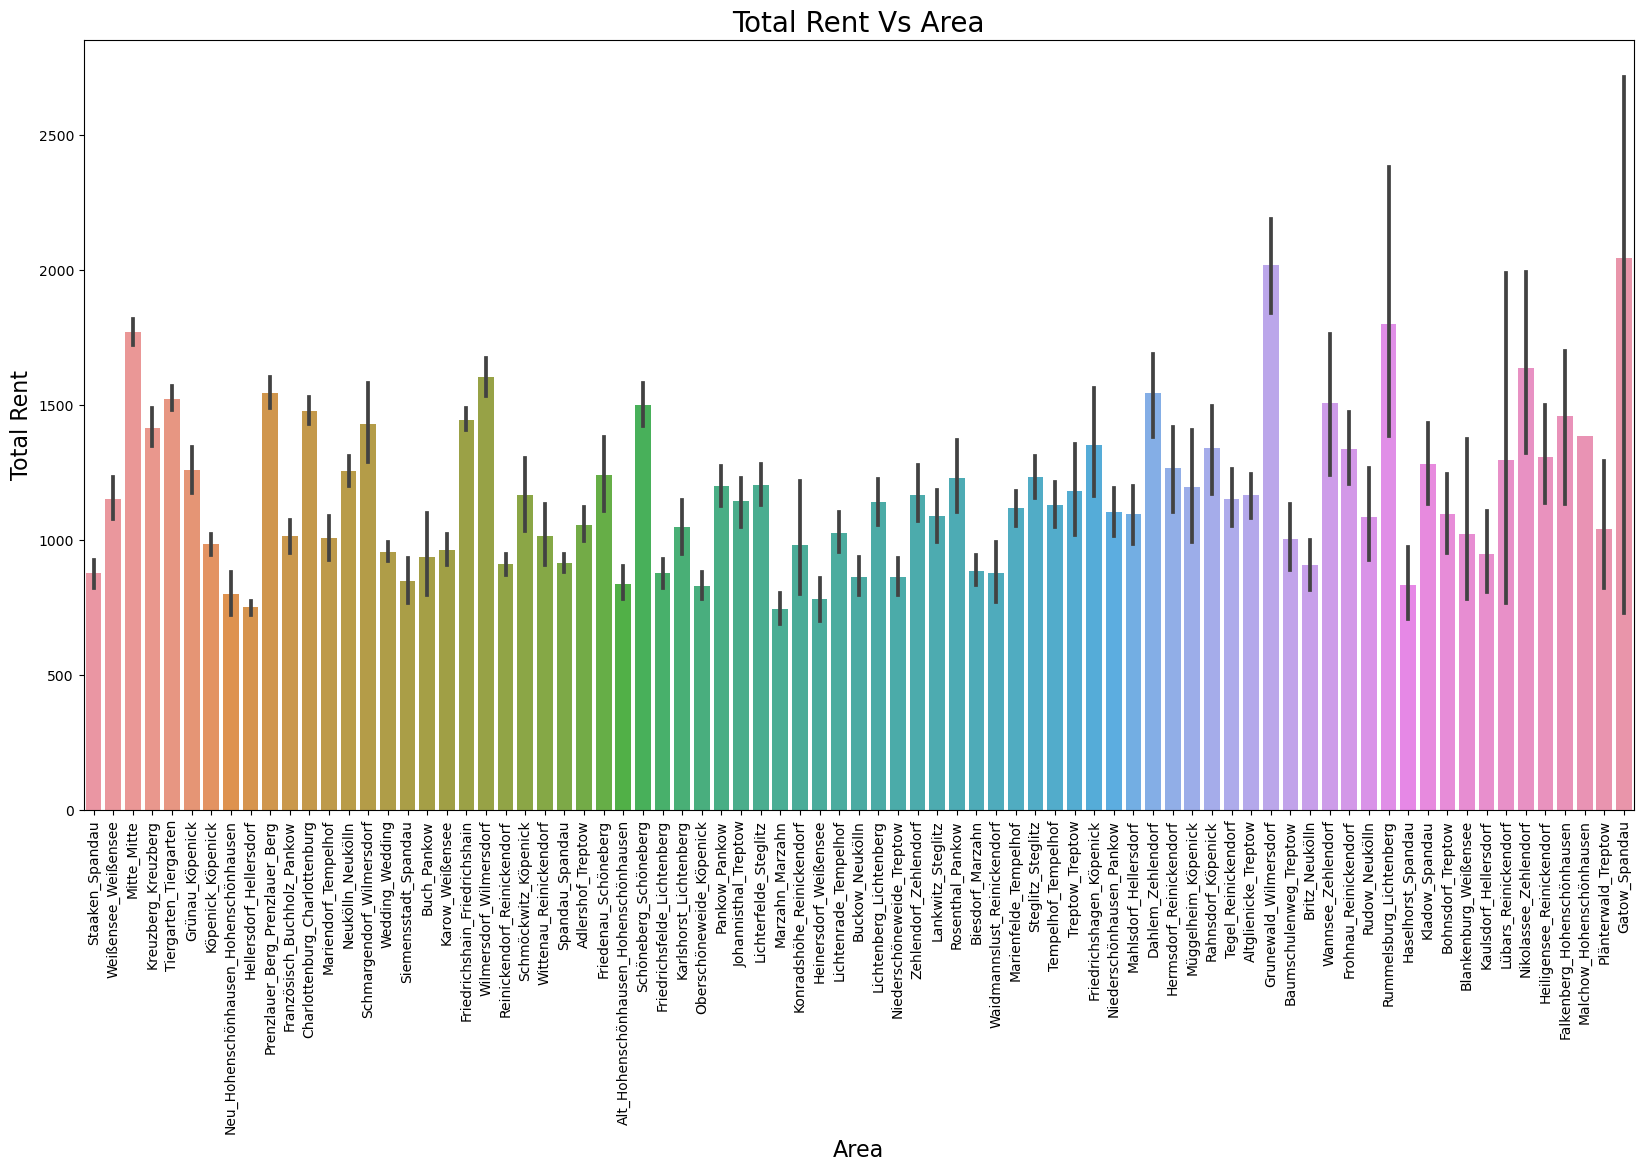

In [18]:
# Make graph showing total rent vs area
plt.figure(figsize=(20,10))
ax = sns.barplot(x='area', y='totalRent', data=data_berlin)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Total Rent Vs Area', fontsize=20)
plt.xlabel('Area', fontsize=16)
plt.ylabel('Total Rent', fontsize=16)


The areas 'Grunewald Wilmersdorf', 'Mitte', 'Dahlem Zehlendorf', 'Nikolassee Zehlendorf', and 'Gatow Spandau' have the highest rent apartments, and the lowest rent apartments are 'Marzahn' and 'Hellersdorf'.

In [19]:
# Effect of year constructed on total rent
data_berlin['yearConstructed'].value_counts()

1965.192072    1324
2019.000000     931
1900.000000     743
2018.000000     596
1910.000000     292
               ... 
1873.000000       1
1856.000000       1
1832.000000       1
2029.000000       1
1876.000000       1
Name: yearConstructed, Length: 154, dtype: int64

Most of the apartments are made in the year 1965.

Text(0, 0.5, 'Total Rent')

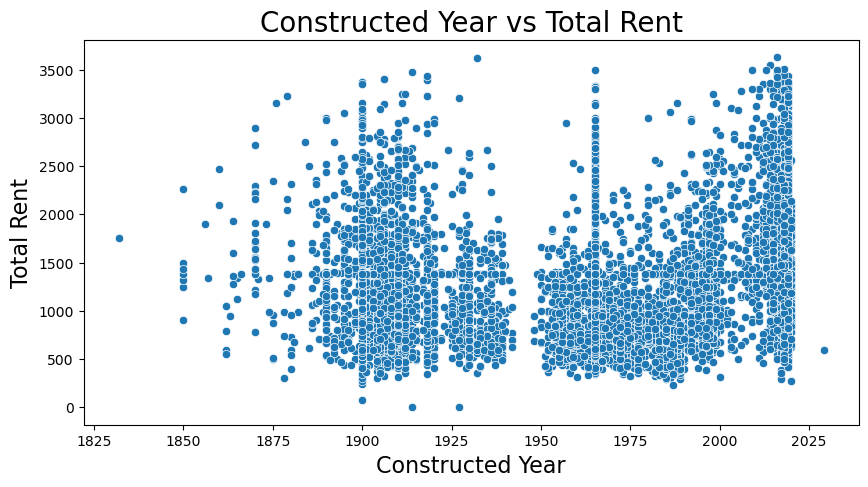

In [20]:
year_counts = data_berlin['yearConstructed'].value_counts()
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='yearConstructed', y='totalRent', data=data_berlin)
plt.title('Constructed Year vs Total Rent', fontsize=20)
plt.xlabel('Constructed Year', fontsize=16)
plt.ylabel('Total Rent', fontsize=16)

Apartments made in 1900 and 1965 have higher rents. \
The rent of very old apartments (1850-1900) is low. \
Newly made apartments from the year 2000 have high rent. \
Old apartments made from 1900-1920 also have high rent.

Text(0, 0.5, 'Base Rent')

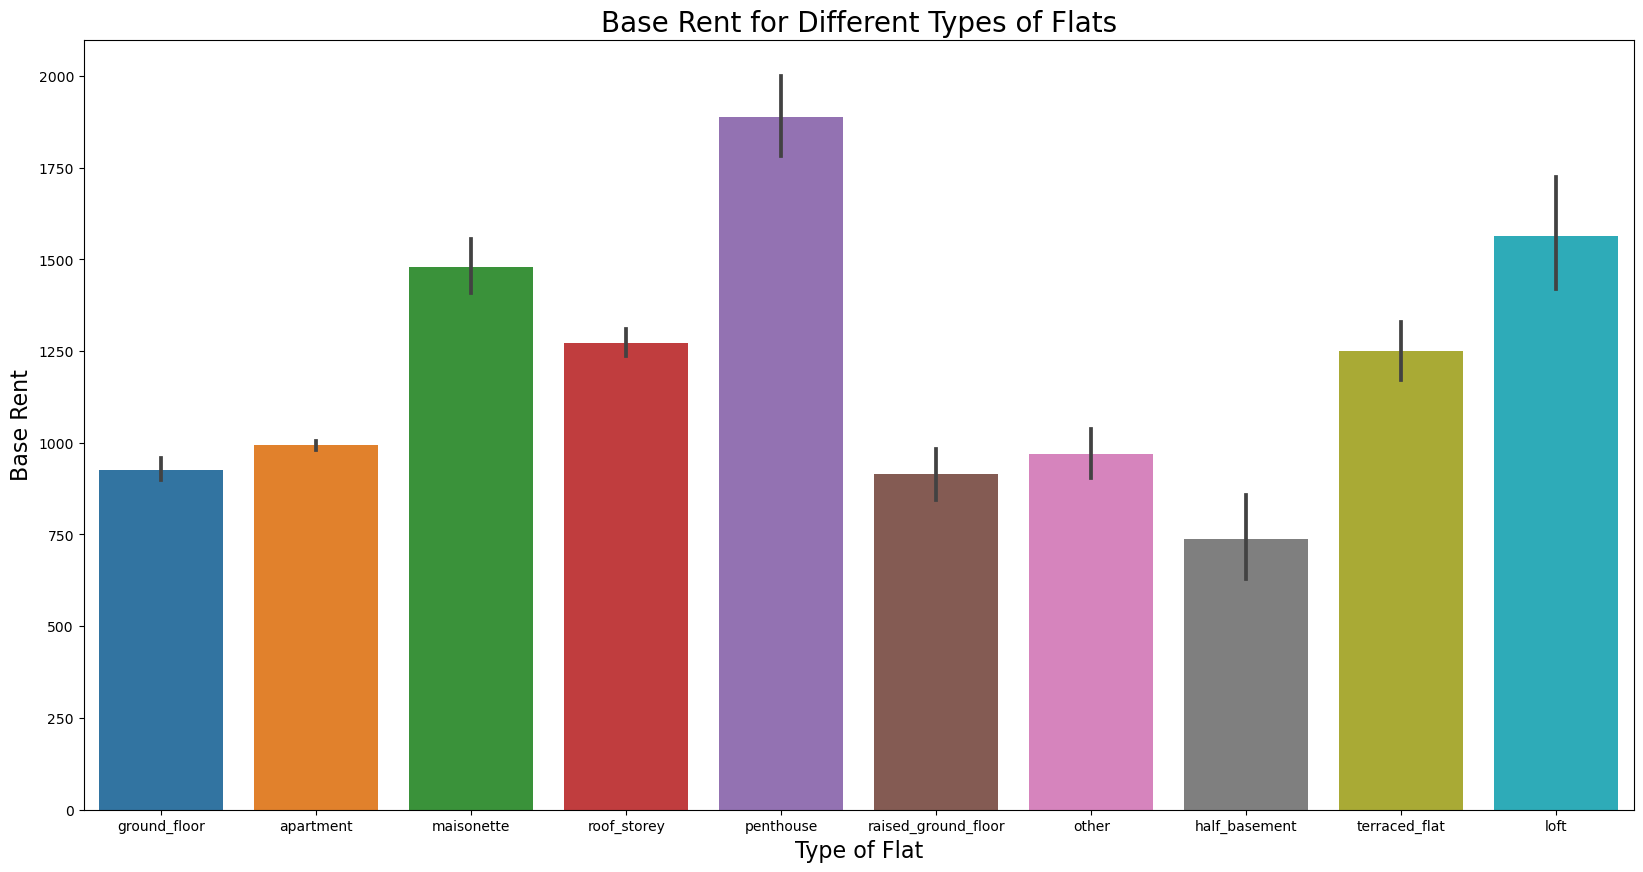

In [21]:
# Base rent for different types of flats
plt.figure(figsize=(20,10))
ax = sns.barplot(x='typeOfFlat', y='baseRent', data=data_berlin)
plt.title('Base Rent for Different Types of Flats', fontsize=20)
plt.xlabel('Type of Flat', fontsize=16)
plt.ylabel('Base Rent', fontsize=16)

The most expensive flats are 'penthouse', 'loft', and 'maisonette'. \
The flats with low rent are 'half basement', 'ground floor', and 'raised ground floor'. \
'Roof storey' and 'terraced flat' have rents above average.

There are other factors due to which the rent of flat increases. \
Below diagram shows the pie chart of the base rent with these factors. 

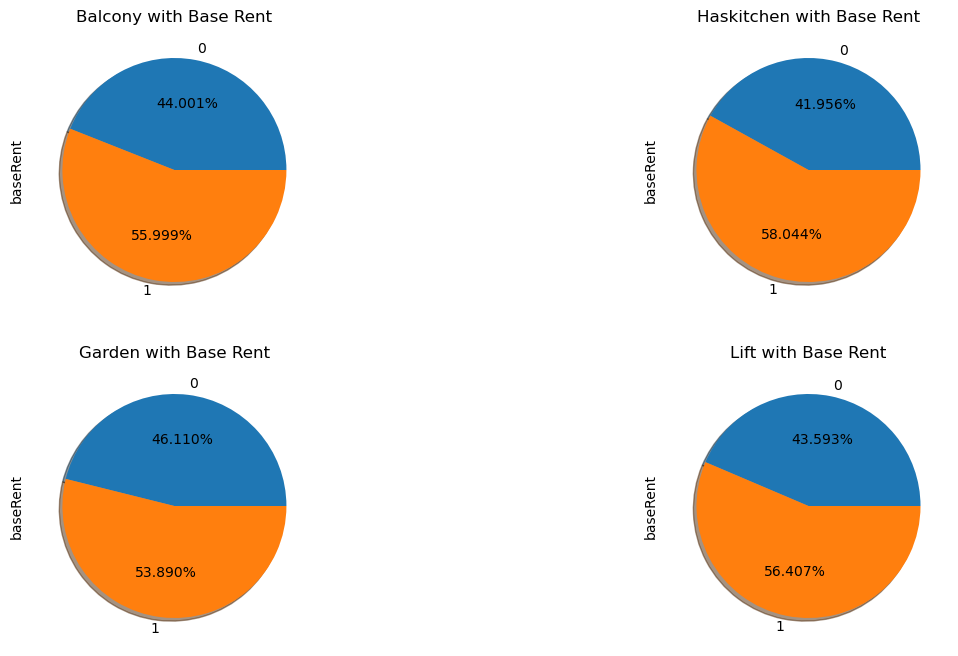

In [22]:
# Plot pie charts for factors affecting base rent
factors = ['balcony', 'hasKitchen', 'garden', 'lift']
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
for i, factor in enumerate(factors):
    ax = axs[i // 2, i % 2]
    data_berlin.groupby(factor)['baseRent'].mean().plot.pie(
        autopct='%1.3f%%', shadow=True, ax=ax)
    ax.set_title(f'{factor.capitalize()} with Base Rent')

Based on the pie charts presented above, it is evident that the inclusion of certain amenities such as a balcony, kitchen, lift, and garden can lead to an increase in rent. Notably, the kitchen has the highest base rent compared to the factors.

Various flats are equipped with different types of heating systems that can either increase or decrease the rent. The following graph illustrates the service charges associated with each type of heating.

Text(0, 0.5, 'Service Charge')

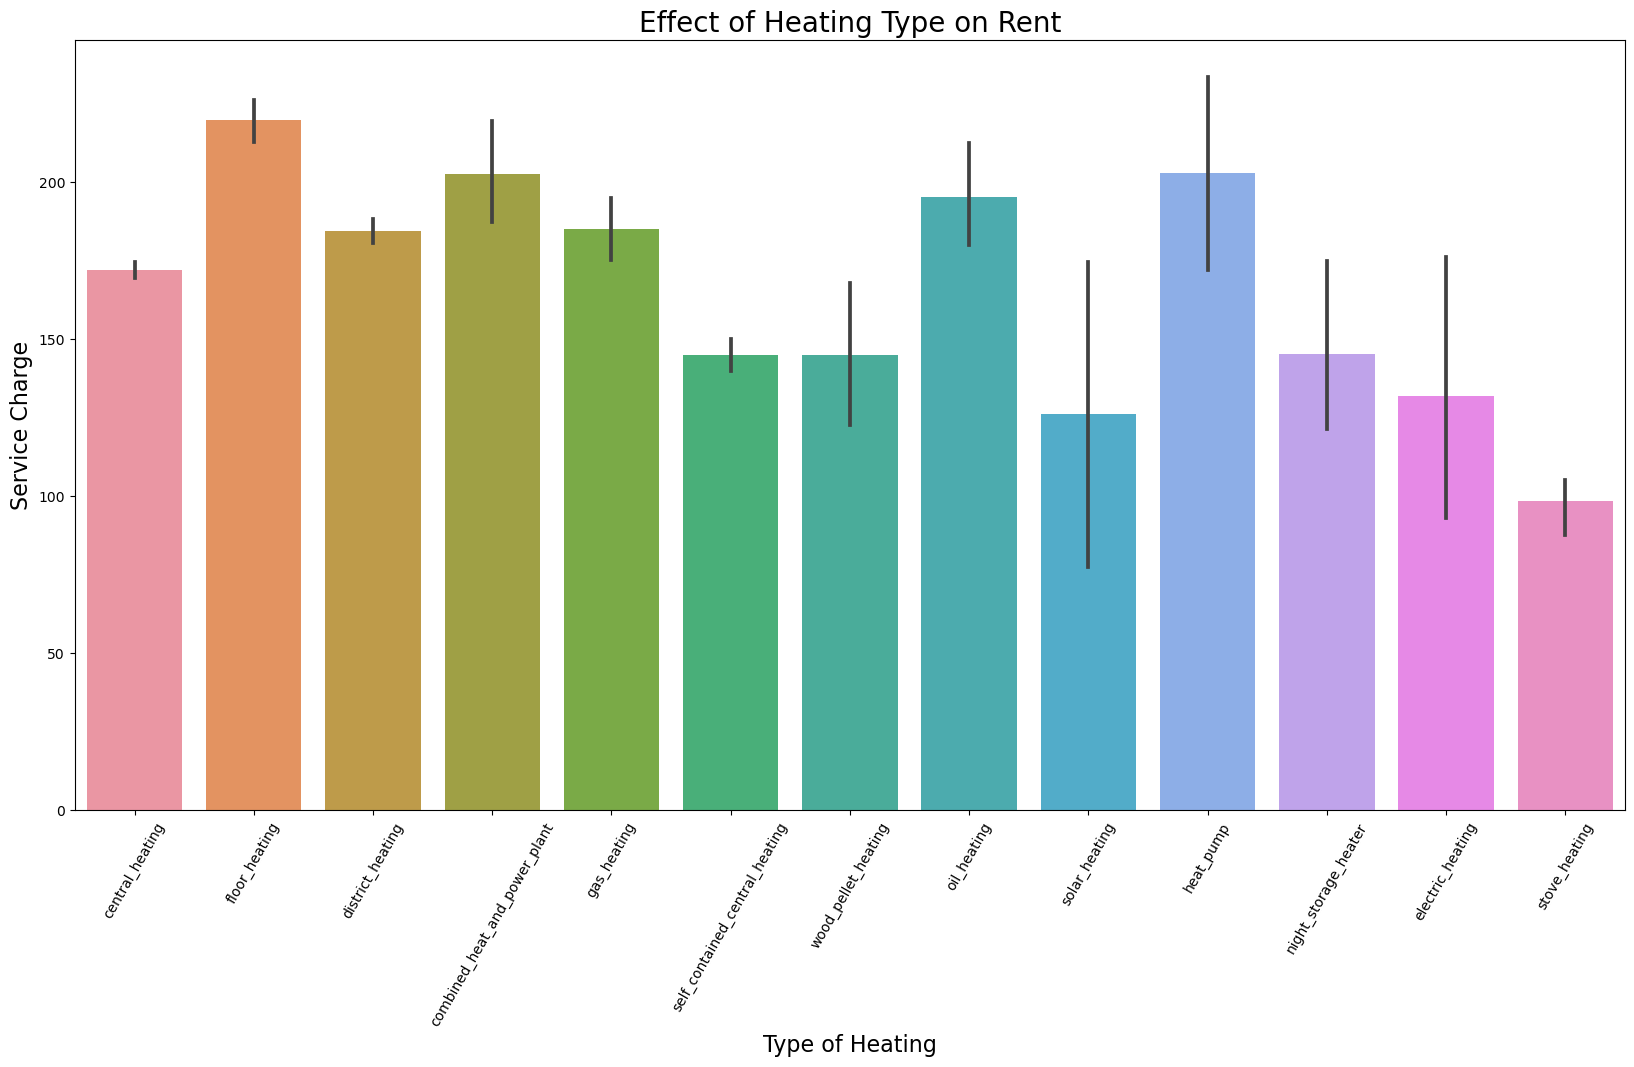

In [23]:
# Plot bar chart for service charges by heating type
plt.figure(figsize=(20, 10))
sns.barplot(x='heatingType', y='serviceCharge', data=data_berlin)
plt.xticks(rotation=60)
plt.title('Effect of Heating Type on Rent', fontsize=20)
plt.xlabel('Type of Heating', fontsize=16)
plt.ylabel('Service Charge', fontsize=16)

Based on the graph, it can be concluded that floor heating is the most expensive type of heating, while stove heating is the most affordable. Additionally, district heating, combined heat, gas heating, and heat pump are also relatively costly.

There are additional charges for keeping pets in the flats. The following graph displays the total rent for flats where pets are either allowed, not allowed, or negotiable.

Text(0, 0.5, 'Total Rent')

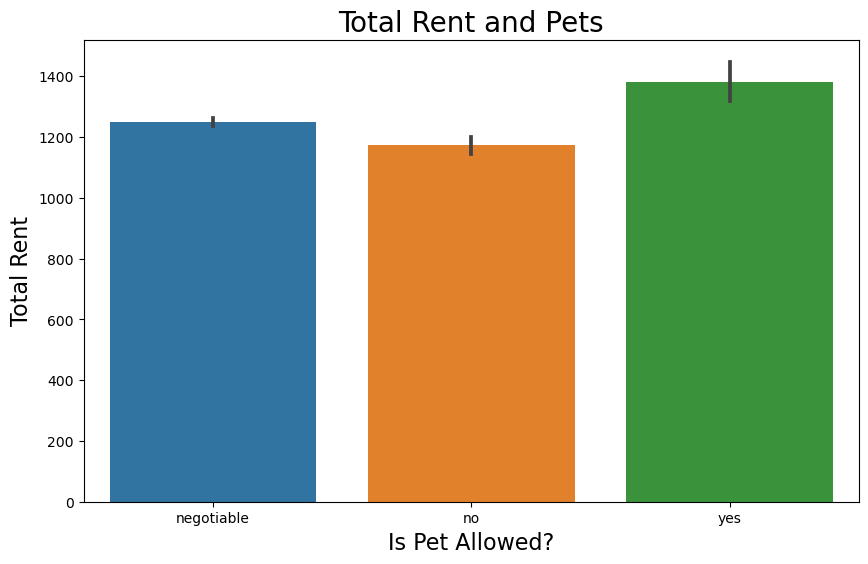

In [24]:
# Plot bar chart for total rent by pet policy
plt.figure(figsize=(10, 6))
sns.barplot(x='petsAllowed', y='totalRent', data=data_berlin)
plt.title('Total Rent and Pets', fontsize=20)
plt.xlabel('Is Pet Allowed?', fontsize=16)
plt.ylabel('Total Rent', fontsize=16)

It is evident that the total rent of flats where pets are allowed is higher compared to those where pets are not allowed or are negotiable.

In [25]:
# Build multiple linear regression model
X = data_berlin.drop(columns=['area', 'heatingType', 'balcony', 'totalRent',
                     'hasKitchen', 'yearConstructed', 'baseRent',
                     'petsAllowed', 'lift', 'typeOfFlat', 'garden',
                     'area'])

In [26]:
Y = data_berlin['totalRent']

In [27]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.8, random_state=0)

In [28]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [29]:
# Train model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_X, train_Y)

print("Intercept: ", regressor.intercept_)
print("Coefficients: ", regressor.coef_)

Intercept:  1248.663578481902
Coefficients:  [144.76600098 398.13990496 -34.6718517   13.02481589  52.74968818
  12.84805142]


In [30]:
# Prediction of test data
y_predict = regressor.predict(test_X)
df = pd.DataFrame({'Actual':test_Y, 'Predicted':y_predict})
df

,Actual,Predicted
174131,1499.00,939.736906
4854,1408.00,1351.726938
263664,1902.33,2256.102557
67129,1105.17,1155.046420
94673,1300.00,1546.718339
...,...,...
138341,761.25,959.660878
241270,1300.00,1312.479743
163988,950.00,785.603217
1649,2992.67,2706.983570


In [31]:
# Calculate r2
from sklearn.metrics import r2_score
r2_score(test_Y, y_predict)

0.6603854850957965

### Conclusion

Model is 69% accurate in predicting values of total rent.\
In other words, 69% variations in total rent can be explained by serviceCharge, livingSpace, noRooms, floor, and noOfFloor.